<a href="https://colab.research.google.com/github/pagadalaAnu/2203A52046_Deep-Learning/blob/main/2203A52046_PAGADALA_ANANYA_DEEP_LEARNING(ACTIVITY_8).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Hyperparameters
eta = 0.1
gamma = 0.9
m = 1
c = -1
epochs = 100
epsilon = 1e-8
df = pd.read_excel("/content/Load Data in kW.xlsx")

print(df.columns)

# Extract the target variable y
y = df[df.columns[0]].values

# Create X as a sequence of numbers with the same length as y
X = np.arange(len(y)).reshape(-1, 1) # Create X before normalizing y

# Normalize data
scaler = StandardScaler()
X = scaler.fit_transform(X) # Fit and transform X

# Normalize y
y = (y - y.mean()) / y.std()

# Now X and y have the same length, so train_test_split should work
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

v_m = 0
v_c = 0

# Training loop
for epoch in range(epochs):
    grad_m = -np.mean((y_train - (m * X_train.flatten() + c)) * X_train.flatten())
    grad_c = -np.mean(y_train - (m * X_train.flatten() + c))

    v_m = gamma * v_m + (1 - gamma) * grad_m**2
    v_c = gamma * v_c + (1 - gamma) * grad_c**2

    m -= (eta / (np.sqrt(v_m) + epsilon)) * grad_m
    c -= (eta / (np.sqrt(v_c) + epsilon)) * grad_c

    if epoch % 10 == 0:
        print(f"Epoch {epoch}: m = {m}, c = {c}")

Index([5551.82208], dtype='float64')
Epoch 0: m = 0.6837722437626285, c = -0.6837722439635849
Epoch 10: m = -0.0005106152939507013, c = -0.01895705817873305
Epoch 20: m = -0.02555281366982927, c = 0.0020719360523681375
Epoch 30: m = -0.025601400756924342, c = 0.0021007294441134435
Epoch 40: m = -0.02560140075811667, c = 0.0021007294440499075
Epoch 50: m = -0.025601400758116653, c = 0.00210072944405
Epoch 60: m = -0.025601400757769645, c = 0.002100729448000836
Epoch 70: m = -0.025594938004843526, c = 0.0022136745549333875
Epoch 80: m = -0.017126865563776548, c = 0.004389840783511688
Epoch 90: m = 0.003687425437832327, c = 0.015204619734234363


In [10]:

# Compute errors for train data
y_train_pred = m * X_train.flatten() + c
mse_train = mean_squared_error(y_train, y_train_pred)
rmse_train = np.sqrt(mse_train)
mae_train = mean_absolute_error(y_train, y_train_pred)

# Compute errors for test data
y_test_pred = m * X_test.flatten() + c
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
mae_test = mean_absolute_error(y_test, y_test_pred)

print("Training Errors:")
print(f"MSE: {mse_train}, RMSE: {rmse_train}, MAE: {mae_train}")

print("Testing Errors:")
print(f"MSE: {mse_test}, RMSE: {rmse_test}, MAE: {mae_test}")

Training Errors:
MSE: 1.1114171131973252, RMSE: 1.0542376929314021, MAE: 0.0771743490297112
Testing Errors:
MSE: 0.004846931197530202, RMSE: 0.069619905181853, MAE: 0.05609711598651805


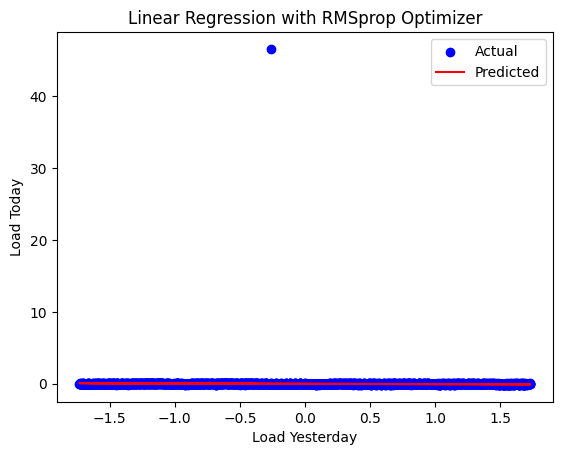

In [11]:
# Plot results
plt.scatter(X_train, y_train, color='blue', label='Actual')
plt.plot(X_train, y_train_pred, color='red', label='Predicted')
plt.xlabel("Load Yesterday")
plt.ylabel("Load Today")
plt.title("Linear Regression with RMSprop Optimizer")
plt.legend()
plt.show()